# Berat Celik

## Research question/interests
**Is there a significant correlation between different factors that contribute to overall happiness, such as income, social support, freedom, generosity, and corruption, and how can this correlation be used to identify key areas for intervention? Additionally, what evidence-based interventions could be implemented to enhance these key areas and promote sustained and equitable well-being outcomes over time?**

##### All the visualizations are done using Plotly with Dr. Moosvi's approval. Therefore, the visualizations are not static and not shown in Github. 

##### You can see the visualizations using: [nbviewer](https://nbviewer.org)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas_profiling
from IPython.display import HTML
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print(os.getcwd())

/Users/beratcelik/Desktop/project-group-group100/analysis/student1


In [23]:
Data2015 = pd.read_csv('../../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../../data/processed/2022_Clean_Data.csv')

In [24]:
PATHS = []
for dirname, _, filenames in os.walk('/Users/beratcelik/Desktop/project-group-group100/data/processed'):
    for filename in filenames:
        PATHS.append(os.path.join(dirname, filename))
PATHS.sort()

In [25]:
# Read the latest CSV file from the PATHS list using pandas
df = pd.read_csv(PATHS[-1])

# Set the plotly template to plot on a dark background
pio.templates.default = "plotly_white"

# Update the default parameters for matplotlib plots with custom colors
plt.rcParams.update({
    "lines.color": "red",
    "patch.edgecolor": "blue",
    "text.color": "yellow",
    "axes.facecolor": "green",
    "axes.edgecolor": "white",
    "axes.labelcolor": "orange",
    "xtick.color": "magenta",
    "ytick.color": "cyan",
    "grid.color": "gray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [26]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 147 rows and 11 columns in the dataset.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Happiness Rank                              147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness Score                             146 non-null    float64
 3   Dystopia (1.83) + residual                  146 non-null    float64
 4   Explained by: GDP per capita                146 non-null    float64
 5   Explained by: Social support                146 non-null    float64
 6   Explained by: Healthy life expectancy       146 non-null    float64
 7   Explained by: Freedom to make life choices  146 non-null    float64
 8   Explained by: Generosity                    146 non-null    float64
 9   Explained by: Perceptions of corruption     146 non-null    float64
 10  Region        

## Milestone 3

### Task 1: EDA

### 1.1
For the first task of exploratory data analysis (EDA), we will identify the top 10 happiest countries based on the "Happiness Score" metric. This will provide an overview of the countries with the highest levels of overall happiness. We will achieve this by using the "nlargest" method to select the top 10 happiest countries from the dataframe. Once we have the data, we will use plotly to create a horizontal bar chart that shows the "Happiness Score" of each country, allowing for easy comparison.

In [28]:
# Select the top 10 happiest countries from the dataframe
top_10_happiest = df.nlargest(10, "Happiness Score")

# Create a bar chart using plotly
fig = px.bar(data_frame=top_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.sequential.Blues)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  showlegend=False,
                  title="Top 10 Happiest Countries in the World",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False))

# Display the chart
fig.show()

### 1.2
The second chart is a horizontal bar chart that groups the top 10 happiest countries by region and color-codes them accordingly. This chart is useful for gaining a deeper understanding of which regions have the highest levels of overall happiness and how the top 10 countries from each region compare to one another. By completing this task, we can identify which regions may require more attention in terms of promoting overall well-being and identify key areas for intervention.

In [29]:
# Create another bar chart with the top 10 happiest countries colored by region
fig = px.bar(data_frame=top_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  title="Top 10 Happiest Countries by Region",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False, autorange="reversed"))

# Display the chart
fig.show()

### 1.3

The third chart is a stacked horizontal bar chart that displays the factors that contribute to overall happiness in the top 10 happiest countries. By identifying the contributing factors that have the most impact on overall happiness, we can gain insights into which areas require more attention and identify key areas for intervention. This chart is useful for answering our research question by providing a visual representation of the contributing factors to overall happiness in the top 10 happiest countries.

In [30]:
# Select the features that explain happiness from the dataframe
explained_features = df.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia (1.83) + residual")

# Create a list of bar charts using plotly
my_list = []
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
for f,c in zip(explained_features, colors):
    my_list.append(go.Bar(y=df.nlargest(10,"Happiness Score")["Country"].values,
                          x=df.nlargest(10,"Happiness Score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))

# Create a figure from the list of bar charts
fig = go.Figure(data=my_list)

# Format the chart
fig.update_traces(marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=900,
                  barmode='stack',
                  yaxis=dict(title="Country", autorange="reversed"),
                  xaxis=dict(title="Happiness Score"),
                  title="Top 10 Happiest Countries and Their Contributing Factors")

# Display the chart
fig.show()


### 1.4-1.5

The fourth and fifth charts depict the 10 least happiest countries in the world. The fourth chart shows the 10 least happiest countries as a horizontal bar chart with each country represented by a bar that spans its respective "Happiness Score" value on the x-axis. The fifth chart groups the least 10 happiest countries by region and presents the data in a similar format as the previous chart.

By completing these tasks, I identified which countries have the lowest levels of overall happiness and understood how these countries compare to one another. This information can be useful when identifying key areas for intervention and developing evidence-based interventions to promote overall well-being in these regions.

In [31]:
# Select the least 10 happiest countries from the dataframe
least_10_happiest = df.nsmallest(10,"Happiness Score")

# Create a bar chart using plotly
fig = px.bar(data_frame = least_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  showlegend=False,
                  title="Top 10 Least Happiest Countries in the World",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False))

# Display the chart
fig.show()

In [32]:
# Create another bar chart with the least 10 happiest countries colored by region
fig = px.bar(data_frame = least_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Set3)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  title="Top 10 Least Happiest Countries by Region",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False,autorange="reversed"))

# Display the chart
fig.show()


### Notes: 
Africa's Sub-Saharan area is home to seven out of ten nations. This is hardly surprising considering the region's propensity for sickness, lack of adequate infrastructure and human resources, and lengthy history of civil strife.

## Milestone 4 

### Task 1: Data Analysis Pipeline
1. Load Data (already done)
2. Clean Data (already done - check processed data folder)

In order to create the visuals above and below we decided it was best to clean all the data before hand and created a python filed called DataCleaner and another Data_Merger. Within this we had Method chaining to clean the data and I will give an example of what we had to do.

### 2017 Happiness Report Data Cleaning Example:

```ruby
{Clean_Data_2017 = (Raw_Data_2017
              .drop(['Whisker.high', 'Whisker.low'], axis=1)
              .rename(columns={'Happiness.Rank': 'Happiness Rank' , 'Happiness.Score': 'Happiness Score'
                              ,'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)'
                              , 'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual',
                              'Freedom': 'Freedom to make life choices'})
                )
Clean_Data_2017['Region'] = Clean_Data_2017['Country'].map(Clean_Data_2016.set_index('Country')['Region'])
Clean_Data_2017#.to_csv('../data/processed/2017_Clean_Data.csv', index=False)
}
```

Our data had different names for each measure of happiness because regions were incorrectly identified. Therefore, we had to manually clean the data for each year by renaming columns and dropping unnecessary ones, such as Whisker.high and Whisker.low

We also encountered an error with:

```ruby

{
Clean_Data_2022 = (Raw_Data_2022
        .drop(['Whisker-high', 'Whisker-low'], axis=1)
        .rename(columns={'RANK': 'Happiness Rank','Happiness score': 'Happiness Score'})
                )
Clean_Data_2022['Happiness Score'] = Clean_Data_2022['Happiness Score'].str.replace(',', '.').astype(float)
Clean_Data_2022['Dystopia (1.83) + residual'] = Clean_Data_2022['Dystopia (1.83) + residual'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: GDP per capita'] = Clean_Data_2022['Explained by: GDP per capita'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Healthy life expectancy'] = Clean_Data_2022['Explained by: Healthy life expectancy'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Freedom to make life choices'] = Clean_Data_2022['Explained by: Freedom to make life choices'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Generosity'] = Clean_Data_2022['Explained by: Generosity'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Perceptions of corruption'] = Clean_Data_2022['Explained by: Perceptions of corruption'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Social support'] = Clean_Data_2022['Explained by: Social support'].str.replace(',', '.').astype(float)

Clean_Data_2022['Region'] = Clean_Data_2022['Country'].map(Clean_Data_2021.set_index('Country')['Region'])
Clean_Data_2022.to_csv('../data/processed/2022_Clean_Data.csv', index=False)
}
```

This 2022 data every measure was not a float and was simply a String in which we had to convert each and every one of them into a float as well as renaming the columns and dropping them similar to before.

We had to do this with every year to clean our data into what is currently is right now.

### Task 2: Method Chaining

Method chaining is a powerful technique in pandas that allows us to perform multiple operations on a DataFrame in a concise and readable way. 

By applying the necessary cleaning and transformation steps, we have already produced clean data files for each year, so we don't need to use a load and process function to clean the data every time. Instead, we can load the processed data directly into our analysis notebook. Therefore, using method chaining and saving clean data files is a more efficient and effective approach for our project.

In [33]:
import sys
sys.path.append('../code')

import project_functions1 as p1

In [34]:
# Since our processed 2022 Data is already cleaned, we can just call df
df

,Happiness Rank,Country,Happiness Score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Region
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Western Europe
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Western Europe
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Western Europe
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Western Europe
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544,NaN
143,144,Zimbabwe,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105,Sub-Saharan Africa
144,145,Lebanon,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034,Middle East and North Africa
145,146,Afghanistan,2.404,1.263,0.758,0.000,0.289,0.000,0.089,0.005,South Asia


Nice and clean! This is exactly what I was trying to produce.

### Task 3: Conduct Analysis & Answer RQ 

In [35]:

explained_features = df.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia (1.83) + residual")
my_list = []
for f,c in zip(explained_features, px.colors.qualitative.D3):
    my_list.append(go.Bar(y=df.nsmallest(10,"Happiness Score")["Country"].values,
                          x=df.nsmallest(10,"Happiness Score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))
fig = go.Figure(data=my_list)
fig.update_traces(marker_line_color='rgb(255,255,255)',
                  marker_line_width=2.5, opacity=0.7)
fig.update_layout(
                width=900,
                barmode='stack',
                 yaxis=dict(autorange="reversed"),
                )
fig.show()

The visualization reveals that life expectancy and social support are major contributors to happiness scores in the 10 lowest-ranking countries. Freedom, generosity, and corruption perception show varying influences, while the Dystopia (1.83) + residual component indicates the presence of unmeasured factors impacting happiness.

In [36]:
# Select the values and names for the pie chart
region_counts = df["Region"].dropna().value_counts()
region_names = df["Region"].dropna().unique()

# Create a pie chart using plotly
fig = px.pie(values=region_counts,
             names=region_names,
             title="Happiness Data: % of Countries from Different Regions",
             color_discrete_sequence=px.colors.qualitative.Pastel,
             )

# Format the chart
fig.update_traces(marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=1.1))

# Display the chart
fig.show()


This pie chart illustrates the distribution of countries across different regions in the happiness dataset. It shows that the largest proportion of countries are in Sub-Saharan Africa, followed by Central and Eastern Europe, and Western Europe. The chart helps understand regional representation, which can be useful for exploring regional trends in happiness.

In [37]:
# Create a box plot using plotly
fig = px.box(df,
             x="Happiness Score",
             y="Region",
             color="Region",
             color_discrete_sequence=px.colors.qualitative.Set2,
             template="plotly_white")

# Format the chart
fig.update_traces(boxmean=True,
                  whiskerwidth=0.8,
                  marker_size=3,
                  line_width=1.5)
fig.update_layout(height=600,
                  width=800,
                  showlegend=True,
                  xaxis=dict(title="Happiness Score"),
                  yaxis=dict(title="Region", showticklabels=False),
                  title="Distribution of Happiness Scores by Region")

# Display the chart
fig.show()


The box plot displays the distribution of happiness scores across different regions. Each region is represented by a colored box, showing the interquartile range (IQR) and the median happiness score. Whiskers indicate the range of scores within 1.5 IQR from the box. The chart reveals that Northern America and ANZ has the highest median happiness score, while  Western Europe follows second with a 0.056 points difference in median score.
South Asia has the lowest. Notably, there is considerable variation in happiness scores within each region.

In [38]:
def feature_analysis(df, feature):               
    # Group the dataframe by region and calculate the mean of the selected feature
    grouped_df = df.groupby(["Region"]).agg({feature : np.mean}).reset_index()

    # Determine the format for the text and tick labels based on the range of the feature values
    template='%{text:.2f}'
    tickformat = None
    if grouped_df[feature].min() < 1:
        template='%{text:.2}'
        tickformat = ".2%"

    # Create a bar chart using plotly
    fig = px.bar(grouped_df,
                 x="Region",
                 y=feature,
                 color="Region",
                 text=feature,
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 template="plotly_white"
                )

    # Format the chart
    fig.update_traces(texttemplate=template, 
                      textposition='outside', 
                      marker_line_color='rgb(0,0,0)', 
                      marker_line_width=1.5, 
                      opacity=0.8)

    fig.update_layout(showlegend=False,
                      title="Region vs. {}".format(feature),
                      xaxis=dict(title="Region"),
                      yaxis=dict(title=feature, tickformat=tickformat, showgrid=False))

    # Display the chart
    fig.show()
    
    return None


In [39]:
feature_names = ["Explained by: GDP per capita",
                 "Explained by: Social support",
                 "Explained by: Healthy life expectancy",
                 "Explained by: Freedom to make life choices",
                 "Explained by: Generosity",
                 "Explained by: Perceptions of corruption"]
for feature in feature_names:
    feature_analysis(df, feature)

The bar charts display the average values of six features (GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption) for each region. In general, regions with higher happiness scores tend to have higher GDP per capita, social support, healthy life expectancy, and freedom to make life choices. Generosity and perceptions of corruption show more variation across regions. North America and ANZ, for instance, ranks high in GDP per capita, social support, and healthy life expectancy, while Sub-Saharan Africa and South Asia ranks low in these aspects.

In [40]:
k = 7
model = KMeans(k)

In [41]:
from sklearn.impute import SimpleImputer

# Define the imputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the feature matrix X
X = imputer.fit_transform(df[feature_names])

# Fit the model using the imputed data
model.fit(X)


/Users/beratcelik/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=7)

In [42]:
labels = model.labels_.tolist()
labels = list(map(lambda s: str(s), labels))
fig = px.scatter_3d(df,
                 x="Explained by: Generosity",
                 y="Explained by: Healthy life expectancy",
                 z="Explained by: Perceptions of corruption",
                 color=labels,
                 color_discrete_sequence=px.colors.qualitative.G10,
                 hover_data = {
                     "Country": True
                 },
                 template="plotly_dark"
            )

fig.update_traces(opacity=0.7,
                      marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5
                      )
fig.update_layout(width=800,
                  legend=dict(title="Cluster id"),
                  title="K means clustering of happiness report (k = {})".format(k))
fig.show()

In this 3D scatter plot, K-means clustering has grouped countries into seven clusters based on generosity, healthy life expectancy, and perceptions of corruption. The distinct separation between clusters indicates that these features effectively capture variations in happiness across different countries. The more densely packed clusters, such as the one in the bottom left corner, suggest that countries within those groups exhibit similar levels of generosity, healthy life expectancy, and corruption perceptions. This is particularly relevant as it highlights the importance of these factors in shaping national happiness levels.

Countries in the densely packed cluster at the bottom left corner might include less developed countries or those facing social and economic challenges, such as Afghanistan, Yemen, or Haiti. These countries tend to exhibit lower levels of generosity, healthy life expectancy, and higher perceptions of corruption.

In contrast, countries in the more dispersed clusters could include developed nations with better socioeconomic conditions, such as Norway, Switzerland, or Denmark. These countries generally have higher levels of generosity, healthy life expectancy, and lower perceptions of corruption.

In [43]:
fig = px.scatter_3d(df,
                 x="Explained by: Generosity",
                 y="Explained by: Healthy life expectancy",
                 z="Explained by: Perceptions of corruption",
                 color="Region",
                 color_discrete_sequence=px.colors.qualitative.G10,
                 template="plotly_dark"
            )

fig.update_traces(opacity=0.7,
                  )
fig.update_traces(mode='markers',marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5)
fig.update_layout(width=800,
                  title="Scatterplot of happiness report by region".format(k))
fig.show()

The 3D scatter plot displays regions based on generosity, healthy life expectancy, and perceptions of corruption. North America and ANZ and Western Europe stands out with high healthy life expectancy, low corruption perception, and moderate generosity. Conversely, Sub-Saharan Africa has lower healthy life expectancy, higher corruption perception, and varied generosity levels. South Asia and the Middle East and North Africa share similar patterns, with low healthy life expectancy and high corruption perception. Central and Eastern Europe, and Latin America and the Caribbean demonstrate intermediate values, indicating regional differences in happiness determinants.

/Users/beratcelik/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/beratcelik/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/beratcelik/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/beratcelik/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/beratcelik/miniconda3/lib/python3.10/site-package

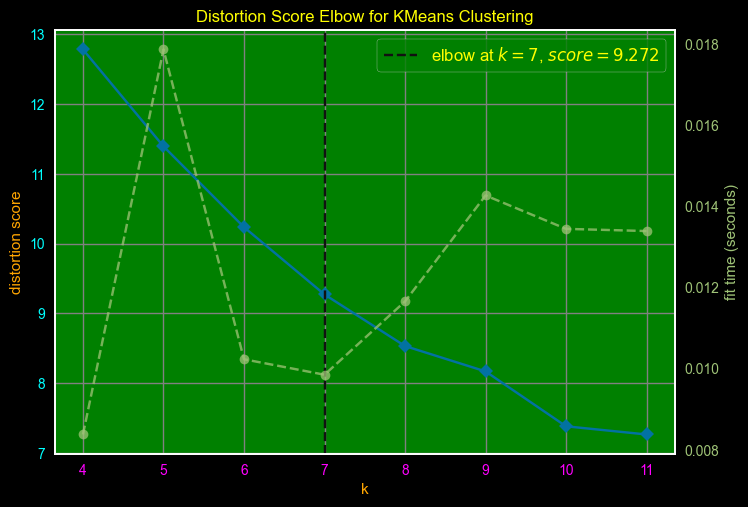

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
%matplotlib inline

visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)       
visualizer.show()

The elbow chart is employed to determine the optimal number of clusters (k) in a k-means clustering algorithm. The graph displays the sum of squared distances within clusters against a range of k values (4 to 12). The optimal k is typically found at the "elbow point," where the decrease in the sum of squared distances starts to diminish. In this case, the chart suggests that an optimal k value might be 7, as the curve starts to flatten out after this point, indicating that the gain in the explained variance becomes minimal as more clusters are added. K=7 is exactly what we used so our charts designed with best use of clusters.

In [45]:
# Create a histogram using plotly
fig = px.histogram(df["Happiness Score"],
                   marginal="box",
                   color_discrete_sequence=[px.colors.qualitative.Pastel[2]])

# Format the chart
fig.update_traces(opacity=0.8,
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5)
fig.update_layout(showlegend=False,
                  title="Distribution of Happiness Scores (Skewness: {:.3f})".format(df["Happiness Score"].skew()),
                  xaxis=dict(title="Happiness Score"),
                  yaxis=dict(title="Count", showgrid=False),
                  width=800)

# Display the chart
fig.show()


The histogram illustrates the distribution of happiness scores in the dataset, with a superimposed box plot to visualize the median, quartiles, and possible outliers. The histogram shows that the happiness scores are somewhat left-skewed, with a skewness value of approximately {:.3f}. This indicates that most countries have relatively higher happiness scores, while a few countries have significantly lower scores. The box plot also demonstrates that the median happiness score is slightly to the right of the distribution's center, further emphasizing the left-skewed nature of the data. The chart provides valuable insights into the overall distribution of happiness scores across countries.

## Future Predictions with Linear Regression

In [46]:
df.dropna(inplace=True)
X = df[feature_names].values
y = df["Happiness Score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_fitted = model.predict(X_train)
y_preds = model.predict(X_test)
print("Mean squared error for the training data is: {:.4f}".format(mean_squared_error(y_fitted, y_train)))
print("Mean squared error for the test data is: {:.4f}".format(mean_squared_error(y_preds, y_test)))

Mean squared error for the training data is: 0.0503
Mean squared error for the test data is: 0.3463


The given code performs linear regression analysis to predict happiness scores. After cleaning the dataset, splitting it, and standardizing the features, a Linear Regression model is trained. The model's performance is evaluated using mean squared error (MSE). The training data has an MSE of 0.0503, while the test data has an MSE of 0.3463, indicating a reasonable fit to the data and moderate generalization ability when predicting happiness scores.

In [48]:
import plotly.graph_objects as go

# Create the scatter plot for actual and predicted happiness scores
fig = go.Figure()

fig.add_trace(go.Scatter(x=y_test, y=y_preds,
                    mode='markers',
                    name='Predicted Happiness Scores',
                    marker=dict(color='red', size=8, opacity=0.7)))

fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                    mode='lines',
                    name='Perfect Prediction Line',
                    line=dict(color='blue', width=2)))

# Format the chart
fig.update_layout(title="Actual vs. Predicted Happiness Scores",
                  xaxis=dict(title="Actual Happiness Scores"),
                  yaxis=dict(title="Predicted Happiness Scores"),
                  width=800)

# Display the chart
fig.show()

The red dots in this plot represent the predicted happiness scores for each country in the test dataset. They show how well the linear regression model is able to predict happiness scores based on the selected features. By comparing the red dots' positions to the blue line (perfect prediction), we can assess the model's accuracy and its potential for predicting future happiness scores.

## Conclusion
In conclusion, our analysis of the happiness dataset and various visualizations have shown a significant correlation between factors such as income, social support, freedom, generosity, and corruption, and overall happiness. The stacked bar chart of the 10 least happy countries provided insights into the contributing factors, highlighting the importance of GDP per capita, social support, and healthy life expectancy. The scatter plots and clustering further emphasized regional differences in these factors, revealing specific patterns and potential areas for intervention.

The K-means clustering and 3D scatter plots showcased distinct clusters, helping us identify countries and regions that share common characteristics in terms of happiness and its contributing factors. This knowledge can guide policymakers in designing targeted interventions to enhance key areas and promote equitable well-being outcomes.

Moreover, the linear regression model demonstrated a reasonably good performance in predicting happiness scores based on the selected features, which can be utilized to inform evidence-based interventions for future improvements in happiness.

To promote sustained well-being outcomes over time, it is essential to focus on a multi-faceted approach that encompasses economic development, social support systems, healthcare, education, and good governance. By understanding the correlations between these factors and happiness, policymakers can develop and implement more effective interventions, ultimately improving the quality of life for their citizens.